In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib
from scipy import signal

In [40]:
#126.98 um = 1024 pixels
#16123.9204 um2 = 1048576 pixels2
micron_conv = 0.01537697 

In [41]:
MS_05062024 = pd.read_csv(r'C:\Users\sqjac\OneDrive\Desktop\05062024_master_sheet.csv')

In [42]:
MS_05062024

,Unnamed: 0,Nuclei_File,Membrane_File,Pixel_Coordinate,Nuclear_Area (pixels),Cell_Area (pixels),N:C_Ratio,circ.,Eccentricity,Bio rep,TechRep,strain
0,0,05062024_dsr17_0k_A_1__nuclei_mask.tif,05062024_dsr17_0k_A_1__cell_mask.tif,9,86,368,0.233696,0.896241,0.795221,"['05062024', 'dsr17', '0k', 'A']","['05062024', 'dsr17', '0k', 'A', '1']","['05062024', 'dsr17', '0k']"
1,1,05062024_dsr17_0k_A_1__nuclei_mask.tif,05062024_dsr17_0k_A_1__cell_mask.tif,10,60,262,0.229008,0.999485,0.357294,"['05062024', 'dsr17', '0k', 'A']","['05062024', 'dsr17', '0k', 'A', '1']","['05062024', 'dsr17', '0k']"
2,2,05062024_dsr17_0k_A_1__nuclei_mask.tif,05062024_dsr17_0k_A_1__cell_mask.tif,11,66,269,0.245353,0.977274,0.502851,"['05062024', 'dsr17', '0k', 'A']","['05062024', 'dsr17', '0k', 'A', '1']","['05062024', 'dsr17', '0k']"
3,3,05062024_dsr17_0k_A_1__nuclei_mask.tif,05062024_dsr17_0k_A_1__cell_mask.tif,12,45,236,0.190678,0.981838,0.609127,"['05062024', 'dsr17', '0k', 'A']","['05062024', 'dsr17', '0k', 'A', '1']","['05062024', 'dsr17', '0k']"
4,4,05062024_dsr17_0k_A_1__nuclei_mask.tif,05062024_dsr17_0k_A_1__cell_mask.tif,13,89,236,0.377119,0.508737,0.999968,"['05062024', 'dsr17', '0k', 'A']","['05062024', 'dsr17', '0k', 'A', '1']","['05062024', 'dsr17', '0k']"
5,5,05062024_dsr17_0k_A_1__nuclei_mask.tif,05062024_dsr17_0k_A_1__cell_mask.tif,15,47,207,0.227053,0.865353,0.606439,"['05062024', 'dsr17', '0k', 'A']","['05062024', 'dsr17', '0k', 'A', '1']","['05062024', 'dsr17', '0k']"
6,6,05062024_dsr17_0k_A_1__nuclei_mask.tif,05062024_dsr17_0k_A_1__cell_mask.tif,16,49,187,0.262032,1.002427,0.521674,"['05062024', 'dsr17', '0k', 'A']","['05062024', 'dsr17', '0k', 'A', '1']","['05062024', 'dsr17', '0k']"
7,7,05062024_dsr17_0k_A_1__nuclei_mask.tif,05062024_dsr17_0k_A_1__cell_mask.tif,19,60,215,0.279070,0.960259,0.560798,"['05062024', 'dsr17', '0k', 'A']","['05062024', 'dsr17', '0k', 'A', '1']","['05062024', 'dsr17', '0k']"
8,8,05062024_dsr17_0k_A_1__nuclei_mask.tif,05062024_dsr17_0k_A_1__cell_mask.tif,21,56,180,0.311111,0.988582,0.665739,"['05062024', 'dsr17', '0k', 'A']","['05062024', 'dsr17', '0k', 'A', '1']","['05062024', 'dsr17', '0k']"
9,9,05062024_dsr17_0k_A_1__nuclei_mask.tif,05062024_dsr17_0k_A_1__cell_mask.tif,22,71,399,0.177945,0.981681,0.659882,"['05062024', 'dsr17', '0k', 'A']","['05062024', 'dsr17', '0k', 'A', '1']","['05062024', 'dsr17', '0k']"


In [43]:
#These lines define the bio rep, techrep, and strain for each row
MS_05062024["Bio rep"] = MS_05062024.apply(lambda x: x["Nuclei_File"][:-19], axis = 1)
MS_05062024["TechRep"] = MS_05062024.apply(lambda x: x["Nuclei_File"][:-17], axis = 1)
MS_05062024["strain"] = MS_05062024.apply(lambda x: x["Nuclei_File"][:-21], axis = 1)
bioreps = MS_05062024.groupby('Bio rep')
bioreps.groups.keys()

dict_keys(['05062024_dsr17_0k_A', '05062024_dsr17_0k_B', '05062024_dsr17_0k_C', '05062024_dsr17_10k_A', '05062024_dsr17_10k_B', '05062024_dsr17_10k_C', '05062024_dsr19_0k_A', '05062024_dsr19_0k_B', '05062024_dsr19_0k_C', '05062024_dsr19_10k_A', '05062024_dsr19_10k_B', '05062024_dsr19_10k_C', '05062024_dsr20_0k_A', '05062024_dsr20_0k_B', '05062024_dsr20_0k_C', '05062024_dsr20_10k_A', '05062024_dsr20_10k_B', '05062024_dsr20_10k_C', '05062024_dsr39_0k_A', '05062024_dsr39_0k_B', '05062024_dsr39_0k_C', '05062024_dsr39_10k_A', '05062024_dsr39_10k_B', '05062024_dsr39_10k_C', '05062024_dsr9_0k_A', '05062024_dsr9_0k_B', '05062024_dsr9_0k_C', '05062024_dsr9_10k_A', '05062024_dsr9_10k_B', '05062024_dsr9_10k_C', '05062024_r1_0k_A', '05062024_r1_0k_B', '05062024_r1_0k_C', '05062024_r1_10k_A', '05062024_r1_10k_B', '05062024_r1_10k_C'])

In [44]:
#Here we get average cell area by bio rep
CA_05062024_dsr17_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr17_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr17_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_05062024_dsr17_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr17_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr17_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_05062024_dsr19_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr19_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr19_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_05062024_dsr19_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr19_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr19_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_05062024_dsr20_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr20_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr20_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_05062024_dsr20_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr20_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr20_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_05062024_dsr39_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr39_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr39_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_05062024_dsr39_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr39_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr39_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_05062024_dsr9_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr9_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr9_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_05062024_dsr9_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr9_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_dsr9_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_05062024_r1_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_r1_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_r1_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

CA_05062024_r1_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_r1_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_r1_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

In [45]:
NA_05062024_dsr17_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_0k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr17_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_0k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr17_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_0k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_05062024_dsr17_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_10k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr17_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_10k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr17_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_10k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_05062024_dsr19_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_0k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr19_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_0k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr19_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_0k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_05062024_dsr19_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_10k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr19_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_10k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr19_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_10k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_05062024_dsr20_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr20_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr20_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_05062024_dsr20_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr20_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr20_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_05062024_dsr39_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_0k_A"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr39_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_0k_B"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr39_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_0k_C"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

NA_05062024_dsr39_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_10k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr39_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_10k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr39_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_10k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_05062024_dsr9_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr9_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr9_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_05062024_dsr9_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr9_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_dsr9_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_05062024_r1_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_r1_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_r1_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NA_05062024_r1_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_A"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_r1_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_B"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_r1_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_C"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

In [46]:
NFA_05062024_dsr17_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_0k_A"]["N:C_Ratio"].mean()
NFA_05062024_dsr17_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_0k_B"]["N:C_Ratio"].mean()
NFA_05062024_dsr17_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_0k_C"]["N:C_Ratio"].mean()

NFA_05062024_dsr17_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_10k_A"]["N:C_Ratio"].mean()
NFA_05062024_dsr17_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_10k_B"]["N:C_Ratio"].mean()
NFA_05062024_dsr17_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_10k_C"]["N:C_Ratio"].mean()

NFA_05062024_dsr19_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_0k_A"]["N:C_Ratio"].mean()
NFA_05062024_dsr19_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_0k_B"]["N:C_Ratio"].mean()
NFA_05062024_dsr19_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_0k_C"]["N:C_Ratio"].mean()

NFA_05062024_dsr19_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_10k_A"]["N:C_Ratio"].mean()
NFA_05062024_dsr19_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_10k_B"]["N:C_Ratio"].mean()
NFA_05062024_dsr19_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_10k_C"]["N:C_Ratio"].mean()

NFA_05062024_dsr20_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_A"]["N:C_Ratio"].mean()
NFA_05062024_dsr20_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_B"]["N:C_Ratio"].mean()
NFA_05062024_dsr20_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_C"]["N:C_Ratio"].mean()

NFA_05062024_dsr20_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_A"]["N:C_Ratio"].mean()
NFA_05062024_dsr20_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_B"]["N:C_Ratio"].mean()
NFA_05062024_dsr20_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_C"]["N:C_Ratio"].mean()

NFA_05062024_dsr39_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_0k_A"]["N:C_Ratio"].mean()
NFA_05062024_dsr39_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_0k_B"]["N:C_Ratio"].mean()
NFA_05062024_dsr39_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_0k_C"]["N:C_Ratio"].mean()

NFA_05062024_dsr39_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_10k_A"]["N:C_Ratio"].mean()
NFA_05062024_dsr39_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_10k_B"]["N:C_Ratio"].mean()
NFA_05062024_dsr39_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_10k_C"]["N:C_Ratio"].mean()

NFA_05062024_dsr9_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_A"]["N:C_Ratio"].mean()
NFA_05062024_dsr9_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_B"]["N:C_Ratio"].mean()
NFA_05062024_dsr9_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_C"]["N:C_Ratio"].mean()

NFA_05062024_dsr9_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_A"]["N:C_Ratio"].mean()
NFA_05062024_dsr9_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_B"]["N:C_Ratio"].mean()
NFA_05062024_dsr9_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_C"]["N:C_Ratio"].mean()

NFA_05062024_r1_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_A"]["N:C_Ratio"].mean()
NFA_05062024_r1_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_B"]["N:C_Ratio"].mean()
NFA_05062024_r1_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_C"]["N:C_Ratio"].mean()

NFA_05062024_r1_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_A"]["N:C_Ratio"].mean()
NFA_05062024_r1_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_B"]["N:C_Ratio"].mean()
NFA_05062024_r1_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_C"]["N:C_Ratio"].mean()

In [47]:
circ_05062024_dsr17_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_0k_A"]["circ."].mean()
circ_05062024_dsr17_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_0k_B"]["circ."].mean()
circ_05062024_dsr17_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_0k_C"]["circ."].mean()

circ_05062024_dsr17_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_10k_A"]["circ."].mean()
circ_05062024_dsr17_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_10k_B"]["circ."].mean()
circ_05062024_dsr17_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_10k_C"]["circ."].mean()

circ_05062024_dsr19_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_0k_A"]["circ."].mean()
circ_05062024_dsr19_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_0k_B"]["circ."].mean()
circ_05062024_dsr19_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_0k_C"]["circ."].mean()

circ_05062024_dsr19_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_10k_A"]["circ."].mean()
circ_05062024_dsr19_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_10k_B"]["circ."].mean()
circ_05062024_dsr19_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_10k_C"]["circ."].mean()

circ_05062024_dsr20_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_A"]["circ."].mean()
circ_05062024_dsr20_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_B"]["circ."].mean()
circ_05062024_dsr20_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_C"]["circ."].mean()

circ_05062024_dsr20_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_A"]["circ."].mean()
circ_05062024_dsr20_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_B"]["circ."].mean()
circ_05062024_dsr20_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_C"]["circ."].mean()

circ_05062024_dsr39_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_0k_A"]["circ."].mean()
circ_05062024_dsr39_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_0k_B"]["circ."].mean()
circ_05062024_dsr39_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_0k_C"]["circ."].mean()

circ_05062024_dsr39_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_10k_A"]["circ."].mean()
circ_05062024_dsr39_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_10k_B"]["circ."].mean()
circ_05062024_dsr39_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_10k_C"]["circ."].mean()

circ_05062024_dsr9_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_A"]["circ."].mean()
circ_05062024_dsr9_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_B"]["circ."].mean()
circ_05062024_dsr9_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_C"]["circ."].mean()

circ_05062024_dsr9_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_A"]["circ."].mean()
circ_05062024_dsr9_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_B"]["circ."].mean()
circ_05062024_dsr9_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_C"]["circ."].mean()

circ_05062024_r1_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_A"]["circ."].mean()
circ_05062024_r1_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_B"]["circ."].mean()
circ_05062024_r1_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_C"]["circ."].mean()

circ_05062024_r1_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_A"]["circ."].mean()
circ_05062024_r1_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_B"]["circ."].mean()
circ_05062024_r1_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_C"]["circ."].mean()

In [48]:
eccen_05062024_dsr17_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_0k_A"]["Eccentricity"].mean()
eccen_05062024_dsr17_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_0k_B"]["Eccentricity"].mean()
eccen_05062024_dsr17_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_0k_C"]["Eccentricity"].mean()

eccen_05062024_dsr17_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_10k_A"]["Eccentricity"].mean()
eccen_05062024_dsr17_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_10k_B"]["Eccentricity"].mean()
eccen_05062024_dsr17_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr17_10k_C"]["Eccentricity"].mean()

eccen_05062024_dsr19_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_0k_A"]["Eccentricity"].mean()
eccen_05062024_dsr19_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_0k_B"]["Eccentricity"].mean()
eccen_05062024_dsr19_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_0k_C"]["Eccentricity"].mean()

eccen_05062024_dsr19_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_10k_A"]["Eccentricity"].mean()
eccen_05062024_dsr19_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_10k_B"]["Eccentricity"].mean()
eccen_05062024_dsr19_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr19_10k_C"]["Eccentricity"].mean()

eccen_05062024_dsr20_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_A"]["Eccentricity"].mean()
eccen_05062024_dsr20_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_B"]["Eccentricity"].mean()
eccen_05062024_dsr20_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_0k_C"]["Eccentricity"].mean()

eccen_05062024_dsr20_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_A"]["Eccentricity"].mean()
eccen_05062024_dsr20_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_B"]["Eccentricity"].mean()
eccen_05062024_dsr20_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr20_10k_C"]["Eccentricity"].mean()

eccen_05062024_dsr39_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_0k_A"]["Eccentricity"].mean()
eccen_05062024_dsr39_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_0k_B"]["Eccentricity"].mean()
eccen_05062024_dsr39_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_0k_C"]["Eccentricity"].mean()

eccen_05062024_dsr39_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_10k_A"]["Eccentricity"].mean()
eccen_05062024_dsr39_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_10k_B"]["Eccentricity"].mean()
eccen_05062024_dsr39_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr39_10k_C"]["Eccentricity"].mean()

eccen_05062024_dsr9_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_A"]["Eccentricity"].mean()
eccen_05062024_dsr9_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_B"]["Eccentricity"].mean()
eccen_05062024_dsr9_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_0k_C"]["Eccentricity"].mean()

eccen_05062024_dsr9_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_A"]["Eccentricity"].mean()
eccen_05062024_dsr9_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_B"]["Eccentricity"].mean()
eccen_05062024_dsr9_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_dsr9_10k_C"]["Eccentricity"].mean()

eccen_05062024_r1_0k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_A"]["Eccentricity"].mean()
eccen_05062024_r1_0k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_B"]["Eccentricity"].mean()
eccen_05062024_r1_0k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_0k_C"]["Eccentricity"].mean()

eccen_05062024_r1_10k_A = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_A"]["Eccentricity"].mean()
eccen_05062024_r1_10k_B = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_B"]["Eccentricity"].mean()
eccen_05062024_r1_10k_C = MS_05062024[MS_05062024["Bio rep"] == "05062024_r1_10k_C"]["Eccentricity"].mean()

In [49]:
CA_05062024_r1_0k = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()
CA_05062024_r1_10k = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Cell_Area (pixels)"].multiply(other = micron_conv).mean()

NA_05062024_r1_0k = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()
NA_05062024_r1_10k = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Nuclear_Area (pixels)"].multiply(other = micron_conv).mean()

NFA_05062024_r1_0k = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["N:C_Ratio"].mean()
NFA_05062024_r1_10k = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["N:C_Ratio"].mean()

circ_05062024_r1_0k = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["circ."].mean()
circ_05062024_r1_10k = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["circ."].mean()

eccen_05062024_r1_0k = MS_05062024[MS_05062024["strain"] == "05062024_r1_0k"]["Eccentricity"].mean()
eccen_05062024_r1_10k = MS_05062024[MS_05062024["strain"] == "05062024_r1_10k"]["Eccentricity"].mean()

In [58]:
CA_05062024_r1_0k

3.6156309732764043

In [76]:
CA_05062924_dsr17_r1_0k_A_ratio = CA_05062024_dsr17_0k_A/CA_05062024_r1_0k
CA_05062024_dsr17_r1_0k_B_ratio = CA_05062024_dsr17_0k_B/CA_05062024_r1_0k
CA_05062024_dsr17_r1_0k_C_ratio = CA_05062024_dsr17_0k_C/CA_05062024_r1_0k 

CA_05062024_dsr17_r1_10k_A_ratio = CA_05062024_dsr17_10k_A/CA_05062024_r1_10k
CA_05062024_dsr17_r1_10k_B_ratio = CA_05062024_dsr17_10k_B/CA_05062024_r1_10k 
CA_05062024_dsr17_r1_10k_C_ratio = CA_05062024_dsr17_10k_C/CA_05062024_r1_10k

CA_05062024_dsr17_10k_0k_A_ratio = CA_05062024_dsr17_10k_A/CA_05062024_dsr17_0k_A
CA_05062024_dsr17_10k_0k_B_ratio = CA_05062024_dsr17_10k_B/CA_05062024_dsr17_0k_B
CA_05062024_dsr17_10k_0k_C_ratio = CA_05062024_dsr17_10k_C/CA_05062024_dsr17_0k_C 

CA_05062024_dsr17_r1_0k_list = [CA_05062024_dsr17_r1_0k_A_ratio,
                                CA_05062024_dsr17_r1_0k_B_ratio,
                                CA_05062024_dsr17_r1_0k_C_ratio]

CA_05062024_dsr17_r1_10k_list = [CA_05062024_dsr17_r1_10k_A_ratio,
                                CA_05062024_dsr17_r1_10k_B_ratio,
                                CA_05062024_dsr17_r1_10k_C_ratio]

CA_05062024_dsr17_10k_0k_list = [CA_05062024_dsr17_10k_0k_A_ratio,
                                CA_05062024_dsr17_10k_0k_B_ratio,
                                CA_05062024_dsr17_10k_0k_C_ratio]


CA_05062024_dsr19_r1_0k_A_ratio = CA_05062024_dsr19_0k_A/CA_05062024_r1_0k 
CA_05062024_dsr19_r1_0k_B_ratio = CA_05062024_dsr19_0k_B/CA_05062024_r1_0k
CA_05062024_dsr19_r1_0k_C_ratio = CA_05062024_dsr19_0k_C/CA_05062024_r1_0k 

CA_05062024_dsr19_r1_10k_A_ratio = CA_05062024_dsr19_10k_A/CA_05062024_r1_10k 
CA_05062024_dsr19_r1_10k_B_ratio = CA_05062024_dsr19_10k_B/CA_05062024_r1_10k 
CA_05062024_dsr19_r1_10k_C_ratio = CA_05062024_dsr19_10k_C/CA_05062024_r1_10k

CA_05062024_dsr19_10k_0k_A_ratio = CA_05062024_dsr19_10k_A/CA_05062024_dsr19_0k_A
CA_05062024_dsr19_10k_0k_B_ratio = CA_05062024_dsr19_10k_B/CA_05062024_dsr19_0k_B
CA_05062024_dsr19_10k_0k_C_ratio = CA_05062024_dsr19_10k_C/CA_05062024_dsr19_0k_C 

CA_05062024_dsr19_r1_0k_list = [CA_05062024_dsr19_r1_0k_A_ratio,
                                CA_05062024_dsr19_r1_0k_B_ratio,
                                CA_05062024_dsr19_r1_0k_C_ratio]

CA_05062024_dsr19_r1_10k_list = [CA_05062024_dsr19_r1_10k_A_ratio,
                                CA_05062024_dsr19_r1_10k_B_ratio,
                                CA_05062024_dsr19_r1_10k_C_ratio]

CA_05062024_dsr19_10k_0k_list = [CA_05062024_dsr19_10k_0k_A_ratio,
                                CA_05062024_dsr19_10k_0k_B_ratio,
                                CA_05062024_dsr19_10k_0k_C_ratio]


CA_05062024_dsr20_r1_0k_A_ratio = CA_05062024_dsr20_0k_A/CA_05062024_r1_0k 
CA_05062024_dsr20_r1_0k_B_ratio = CA_05062024_dsr20_0k_B/CA_05062024_r1_0k
CA_05062024_dsr20_r1_0k_C_ratio = CA_05062024_dsr20_0k_C/CA_05062024_r1_0k 

CA_05062024_dsr20_r1_10k_A_ratio = CA_05062024_dsr20_10k_A/CA_05062024_r1_10k 
CA_05062024_dsr20_r1_10k_B_ratio = CA_05062024_dsr20_10k_B/CA_05062024_r1_10k 
CA_05062024_dsr20_r1_10k_C_ratio = CA_05062024_dsr20_10k_C/CA_05062024_r1_10k

CA_05062024_dsr20_10k_0k_A_ratio = CA_05062024_dsr20_10k_A/CA_05062024_dsr20_0k_A
CA_05062024_dsr20_10k_0k_B_ratio = CA_05062024_dsr20_10k_B/CA_05062024_dsr20_0k_B
CA_05062024_dsr20_10k_0k_C_ratio = CA_05062024_dsr20_10k_C/CA_05062024_dsr20_0k_C 

CA_05062024_dsr20_r1_0k_list = [CA_05062024_dsr20_r1_0k_A_ratio,
                                CA_05062024_dsr20_r1_0k_B_ratio,
                                CA_05062024_dsr20_r1_0k_C_ratio]

CA_05062024_dsr20_r1_10k_list = [CA_05062024_dsr20_r1_10k_A_ratio,
                                CA_05062024_dsr20_r1_10k_B_ratio,
                                CA_05062024_dsr20_r1_10k_C_ratio]

CA_05062024_dsr20_10k_0k_list = [CA_05062024_dsr20_10k_0k_A_ratio,
                                CA_05062024_dsr20_10k_0k_B_ratio,
                                CA_05062024_dsr20_10k_0k_C_ratio]


CA_05062024_dsr39_r1_0k_A_ratio = CA_05062024_dsr39_0k_A/CA_05062024_r1_0k 
CA_05062024_dsr39_r1_0k_B_ratio = CA_05062024_dsr39_0k_B/CA_05062024_r1_0k
CA_05062024_dsr39_r1_0k_C_ratio = CA_05062024_dsr39_0k_C/CA_05062024_r1_0k 

CA_05062024_dsr39_r1_10k_A_ratio = CA_05062024_dsr39_10k_A/CA_05062024_r1_10k 
CA_05062024_dsr39_r1_10k_B_ratio = CA_05062024_dsr39_10k_B/CA_05062024_r1_10k 
CA_05062024_dsr39_r1_10k_C_ratio = CA_05062024_dsr39_10k_C/CA_05062024_r1_10k

CA_05062024_dsr39_10k_0k_A_ratio = CA_05062024_dsr39_10k_A/CA_05062024_dsr39_0k_A
CA_05062024_dsr39_10k_0k_B_ratio = CA_05062024_dsr39_10k_B/CA_05062024_dsr39_0k_B
CA_05062024_dsr39_10k_0k_C_ratio = CA_05062024_dsr39_10k_C/CA_05062024_dsr39_0k_C 

CA_05062024_dsr39_r1_0k_list = [CA_05062024_dsr39_r1_0k_A_ratio,
                                CA_05062024_dsr39_r1_0k_B_ratio,
                                CA_05062024_dsr39_r1_0k_C_ratio]

CA_05062024_dsr39_r1_10k_list = [CA_05062024_dsr39_r1_10k_A_ratio,
                                CA_05062024_dsr39_r1_10k_B_ratio,
                                CA_05062024_dsr39_r1_10k_C_ratio]

CA_05062024_dsr39_10k_0k_list = [CA_05062024_dsr39_10k_0k_A_ratio,
                                CA_05062024_dsr39_10k_0k_B_ratio,
                                CA_05062024_dsr39_10k_0k_C_ratio]

CA_05062024_dsr9_r1_0k_A_ratio = CA_05062024_dsr9_0k_A/CA_05062024_r1_0k 
CA_05062024_dsr9_r1_0k_B_ratio = CA_05062024_dsr9_0k_B/CA_05062024_r1_0k
CA_05062024_dsr9_r1_0k_C_ratio = CA_05062024_dsr9_0k_C/CA_05062024_r1_0k 

CA_05062024_dsr9_r1_10k_A_ratio = CA_05062024_dsr9_10k_A/CA_05062024_r1_10k 
CA_05062024_dsr9_r1_10k_B_ratio = CA_05062024_dsr9_10k_B/CA_05062024_r1_10k 
CA_05062024_dsr9_r1_10k_C_ratio = CA_05062024_dsr9_10k_C/CA_05062024_r1_10k

CA_05062024_dsr9_10k_0k_A_ratio = CA_05062024_dsr9_10k_A/CA_05062024_dsr9_0k_A
CA_05062024_dsr9_10k_0k_B_ratio = CA_05062024_dsr9_10k_B/CA_05062024_dsr9_0k_B
CA_05062024_dsr9_10k_0k_C_ratio = CA_05062024_dsr9_10k_C/CA_05062024_dsr9_0k_C 

CA_05062024_dsr9_r1_0k_list = [CA_05062024_dsr9_r1_0k_A_ratio,
                                CA_05062024_dsr9_r1_0k_B_ratio,
                                CA_05062024_dsr9_r1_0k_C_ratio]

CA_05062024_dsr9_r1_10k_list = [CA_05062024_dsr9_r1_10k_A_ratio,
                                CA_05062024_dsr9_r1_10k_B_ratio,
                                CA_05062024_dsr9_r1_10k_C_ratio]

CA_05062024_dsr9_10k_0k_list = [CA_05062024_dsr9_10k_0k_A_ratio,
                                CA_05062024_dsr9_10k_0k_B_ratio,
                                CA_05062024_dsr9_10k_0k_C_ratio]

CA_05062024_r1_10k_0k_A_ratio = CA_05062024_r1_10k_A/CA_05062024_r1_0k_A
CA_05062024_r1_10k_0k_B_ratio = CA_05062024_r1_10k_B/CA_05062024_r1_0k_B
CA_05062024_r1_10k_0k_C_ratio = CA_05062024_r1_10k_C/CA_05062024_r1_0k_C 

CA_05062024_r1_10k_0k_list = [CA_05062024_r1_10k_0k_A_ratio,
                                CA_05062024_r1_10k_0k_B_ratio,
                                CA_05062024_r1_10k_0k_C_ratio]


In [77]:
NA_05062024_dsr17_r1_0k_A_ratio = NA_05062024_dsr17_0k_A/NA_05062024_r1_0k 
NA_05062024_dsr17_r1_0k_B_ratio = NA_05062024_dsr17_0k_B/NA_05062024_r1_0k
NA_05062024_dsr17_r1_0k_C_ratio = NA_05062024_dsr17_0k_C/NA_05062024_r1_0k 

NA_05062024_dsr17_r1_10k_A_ratio = NA_05062024_dsr17_10k_A/NA_05062024_r1_10k 
NA_05062024_dsr17_r1_10k_B_ratio = NA_05062024_dsr17_10k_B/NA_05062024_r1_10k 
NA_05062024_dsr17_r1_10k_C_ratio = NA_05062024_dsr17_10k_C/NA_05062024_r1_10k

NA_05062024_dsr17_10k_0k_A_ratio = NA_05062024_dsr17_10k_A/NA_05062024_dsr17_0k_A
NA_05062024_dsr17_10k_0k_B_ratio = NA_05062024_dsr17_10k_B/NA_05062024_dsr17_0k_B
NA_05062024_dsr17_10k_0k_C_ratio = NA_05062024_dsr17_10k_C/NA_05062024_dsr17_0k_C 

NA_05062024_dsr17_r1_0k_list = [NA_05062024_dsr17_r1_0k_A_ratio,
                                NA_05062024_dsr17_r1_0k_B_ratio,
                                NA_05062024_dsr17_r1_0k_C_ratio]

NA_05062024_dsr17_r1_10k_list = [NA_05062024_dsr17_r1_10k_A_ratio,
                                NA_05062024_dsr17_r1_10k_B_ratio,
                                NA_05062024_dsr17_r1_10k_C_ratio]

NA_05062024_dsr17_10k_0k_list = [NA_05062024_dsr17_10k_0k_A_ratio,
                                NA_05062024_dsr17_10k_0k_B_ratio,
                                NA_05062024_dsr17_10k_0k_C_ratio]


NA_05062024_dsr19_r1_0k_A_ratio = NA_05062024_dsr19_0k_A/NA_05062024_r1_0k 
NA_05062024_dsr19_r1_0k_B_ratio = NA_05062024_dsr19_0k_B/NA_05062024_r1_0k
NA_05062024_dsr19_r1_0k_C_ratio = NA_05062024_dsr19_0k_C/NA_05062024_r1_0k 

NA_05062024_dsr19_r1_10k_A_ratio = NA_05062024_dsr19_10k_A/NA_05062024_r1_10k 
NA_05062024_dsr19_r1_10k_B_ratio = NA_05062024_dsr19_10k_B/NA_05062024_r1_10k 
NA_05062024_dsr19_r1_10k_C_ratio = NA_05062024_dsr19_10k_C/NA_05062024_r1_10k

NA_05062024_dsr19_10k_0k_A_ratio = NA_05062024_dsr19_10k_A/NA_05062024_dsr19_0k_A
NA_05062024_dsr19_10k_0k_B_ratio = NA_05062024_dsr19_10k_B/NA_05062024_dsr19_0k_B
NA_05062024_dsr19_10k_0k_C_ratio = NA_05062024_dsr19_10k_C/NA_05062024_dsr19_0k_C 

NA_05062024_dsr19_r1_0k_list = [NA_05062024_dsr19_r1_0k_A_ratio,
                                NA_05062024_dsr19_r1_0k_B_ratio,
                                NA_05062024_dsr19_r1_0k_C_ratio]

NA_05062024_dsr19_r1_10k_list = [NA_05062024_dsr19_r1_10k_A_ratio,
                                NA_05062024_dsr19_r1_10k_B_ratio,
                                NA_05062024_dsr19_r1_10k_C_ratio]

NA_05062024_dsr19_10k_0k_list = [NA_05062024_dsr19_10k_0k_A_ratio,
                                NA_05062024_dsr19_10k_0k_B_ratio,
                                NA_05062024_dsr19_10k_0k_C_ratio]


NA_05062024_dsr20_r1_0k_A_ratio = NA_05062024_dsr20_0k_A/NA_05062024_r1_0k 
NA_05062024_dsr20_r1_0k_B_ratio = NA_05062024_dsr20_0k_B/NA_05062024_r1_0k
NA_05062024_dsr20_r1_0k_C_ratio = NA_05062024_dsr20_0k_C/NA_05062024_r1_0k 

NA_05062024_dsr20_r1_10k_A_ratio = NA_05062024_dsr20_10k_A/NA_05062024_r1_10k 
NA_05062024_dsr20_r1_10k_B_ratio = NA_05062024_dsr20_10k_B/NA_05062024_r1_10k 
NA_05062024_dsr20_r1_10k_C_ratio = NA_05062024_dsr20_10k_C/NA_05062024_r1_10k

NA_05062024_dsr20_10k_0k_A_ratio = NA_05062024_dsr20_10k_A/NA_05062024_dsr20_0k_A
NA_05062024_dsr20_10k_0k_B_ratio = NA_05062024_dsr20_10k_B/NA_05062024_dsr20_0k_B
NA_05062024_dsr20_10k_0k_C_ratio = NA_05062024_dsr20_10k_C/NA_05062024_dsr20_0k_C 

NA_05062024_dsr20_r1_0k_list = [NA_05062024_dsr20_r1_0k_A_ratio,
                                NA_05062024_dsr20_r1_0k_B_ratio,
                                NA_05062024_dsr20_r1_0k_C_ratio]

NA_05062024_dsr20_r1_10k_list = [NA_05062024_dsr20_r1_10k_A_ratio,
                                NA_05062024_dsr20_r1_10k_B_ratio,
                                NA_05062024_dsr20_r1_10k_C_ratio]

NA_05062024_dsr20_10k_0k_list = [NA_05062024_dsr20_10k_0k_A_ratio,
                                NA_05062024_dsr20_10k_0k_B_ratio,
                                NA_05062024_dsr20_10k_0k_C_ratio]


NA_05062024_dsr39_r1_0k_A_ratio = NA_05062024_dsr39_0k_A/NA_05062024_r1_0k 
NA_05062024_dsr39_r1_0k_B_ratio = NA_05062024_dsr39_0k_B/NA_05062024_r1_0k
NA_05062024_dsr39_r1_0k_C_ratio = NA_05062024_dsr39_0k_C/NA_05062024_r1_0k 

NA_05062024_dsr39_r1_10k_A_ratio = NA_05062024_dsr39_10k_A/NA_05062024_r1_10k 
NA_05062024_dsr39_r1_10k_B_ratio = NA_05062024_dsr39_10k_B/NA_05062024_r1_10k 
NA_05062024_dsr39_r1_10k_C_ratio = NA_05062024_dsr39_10k_C/NA_05062024_r1_10k

NA_05062024_dsr39_10k_0k_A_ratio = NA_05062024_dsr39_10k_A/NA_05062024_dsr39_0k_A
NA_05062024_dsr39_10k_0k_B_ratio = NA_05062024_dsr39_10k_B/NA_05062024_dsr39_0k_B
NA_05062024_dsr39_10k_0k_C_ratio = NA_05062024_dsr39_10k_C/NA_05062024_dsr39_0k_C 

NA_05062024_dsr39_r1_0k_list = [NA_05062024_dsr39_r1_0k_A_ratio,
                                NA_05062024_dsr39_r1_0k_B_ratio,
                                NA_05062024_dsr39_r1_0k_C_ratio]

NA_05062024_dsr39_r1_10k_list = [NA_05062024_dsr39_r1_10k_A_ratio,
                                NA_05062024_dsr39_r1_10k_B_ratio,
                                NA_05062024_dsr39_r1_10k_C_ratio]

NA_05062024_dsr39_10k_0k_list = [NA_05062024_dsr39_10k_0k_A_ratio,
                                NA_05062024_dsr39_10k_0k_B_ratio,
                                NA_05062024_dsr39_10k_0k_C_ratio]

NA_05062024_dsr9_r1_0k_A_ratio = NA_05062024_dsr9_0k_A/NA_05062024_r1_0k 
NA_05062024_dsr9_r1_0k_B_ratio = NA_05062024_dsr9_0k_B/NA_05062024_r1_0k
NA_05062024_dsr9_r1_0k_C_ratio = NA_05062024_dsr9_0k_C/NA_05062024_r1_0k 

NA_05062024_dsr9_r1_10k_A_ratio = NA_05062024_dsr9_10k_A/NA_05062024_r1_10k 
NA_05062024_dsr9_r1_10k_B_ratio = NA_05062024_dsr9_10k_B/NA_05062024_r1_10k 
NA_05062024_dsr9_r1_10k_C_ratio = NA_05062024_dsr9_10k_C/NA_05062024_r1_10k

NA_05062024_dsr9_10k_0k_A_ratio = NA_05062024_dsr9_10k_A/NA_05062024_dsr9_0k_A
NA_05062024_dsr9_10k_0k_B_ratio = NA_05062024_dsr9_10k_B/NA_05062024_dsr9_0k_B
NA_05062024_dsr9_10k_0k_C_ratio = NA_05062024_dsr9_10k_C/NA_05062024_dsr9_0k_C 

NA_05062024_dsr9_r1_0k_list = [NA_05062024_dsr9_r1_0k_A_ratio,
                                NA_05062024_dsr9_r1_0k_B_ratio,
                                NA_05062024_dsr9_r1_0k_C_ratio]

NA_05062024_dsr9_r1_10k_list = [NA_05062024_dsr9_r1_10k_A_ratio,
                                NA_05062024_dsr9_r1_10k_B_ratio,
                                NA_05062024_dsr9_r1_10k_C_ratio]

NA_05062024_dsr9_10k_0k_list = [NA_05062024_dsr9_10k_0k_A_ratio,
                                NA_05062024_dsr9_10k_0k_B_ratio,
                                NA_05062024_dsr9_10k_0k_C_ratio]

NA_05062024_r1_10k_0k_A_ratio = NA_05062024_r1_10k_A/NA_05062024_r1_0k_A
NA_05062024_r1_10k_0k_B_ratio = NA_05062024_r1_10k_B/NA_05062024_r1_0k_B
NA_05062024_r1_10k_0k_C_ratio = NA_05062024_r1_10k_C/NA_05062024_r1_0k_C 

NA_05062024_r1_10k_0k_list = [NA_05062024_r1_10k_0k_A_ratio,
                                NA_05062024_r1_10k_0k_B_ratio,
                                NA_05062024_r1_10k_0k_C_ratio]

In [78]:
NFA_05062024_dsr17_r1_0k_A_ratio = NFA_05062024_dsr17_0k_A/NFA_05062024_r1_0k 
NFA_05062024_dsr17_r1_0k_B_ratio = NFA_05062024_dsr17_0k_B/NFA_05062024_r1_0k
NFA_05062024_dsr17_r1_0k_C_ratio = NFA_05062024_dsr17_0k_C/NFA_05062024_r1_0k 

NFA_05062024_dsr17_r1_10k_A_ratio = NFA_05062024_dsr17_10k_A/NFA_05062024_r1_10k 
NFA_05062024_dsr17_r1_10k_B_ratio = NFA_05062024_dsr17_10k_B/NFA_05062024_r1_10k 
NFA_05062024_dsr17_r1_10k_C_ratio = NFA_05062024_dsr17_10k_C/NFA_05062024_r1_10k

NFA_05062024_dsr17_10k_0k_A_ratio = NFA_05062024_dsr17_10k_A/NFA_05062024_dsr17_0k_A
NFA_05062024_dsr17_10k_0k_B_ratio = NFA_05062024_dsr17_10k_B/NFA_05062024_dsr17_0k_B
NFA_05062024_dsr17_10k_0k_C_ratio = NFA_05062024_dsr17_10k_C/NFA_05062024_dsr17_0k_C 

NFA_05062024_dsr17_r1_0k_list = [NFA_05062024_dsr17_r1_0k_A_ratio,
                                NFA_05062024_dsr17_r1_0k_B_ratio,
                                NFA_05062024_dsr17_r1_0k_C_ratio]

NFA_05062024_dsr17_r1_10k_list = [NFA_05062024_dsr17_r1_10k_A_ratio,
                                NFA_05062024_dsr17_r1_10k_B_ratio,
                                NFA_05062024_dsr17_r1_10k_C_ratio]

NFA_05062024_dsr17_10k_0k_list = [NFA_05062024_dsr17_10k_0k_A_ratio,
                                NFA_05062024_dsr17_10k_0k_B_ratio,
                                NFA_05062024_dsr17_10k_0k_C_ratio]


NFA_05062024_dsr19_r1_0k_A_ratio = NFA_05062024_dsr19_0k_A/NFA_05062024_r1_0k 
NFA_05062024_dsr19_r1_0k_B_ratio = NFA_05062024_dsr19_0k_B/NFA_05062024_r1_0k
NFA_05062024_dsr19_r1_0k_C_ratio = NFA_05062024_dsr19_0k_C/NFA_05062024_r1_0k 

NFA_05062024_dsr19_r1_10k_A_ratio = NFA_05062024_dsr19_10k_A/NFA_05062024_r1_10k 
NFA_05062024_dsr19_r1_10k_B_ratio = NFA_05062024_dsr19_10k_B/NFA_05062024_r1_10k 
NFA_05062024_dsr19_r1_10k_C_ratio = NFA_05062024_dsr19_10k_C/NFA_05062024_r1_10k

NFA_05062024_dsr19_10k_0k_A_ratio = NFA_05062024_dsr19_10k_A/NFA_05062024_dsr19_0k_A
NFA_05062024_dsr19_10k_0k_B_ratio = NFA_05062024_dsr19_10k_B/NFA_05062024_dsr19_0k_B
NFA_05062024_dsr19_10k_0k_C_ratio = NFA_05062024_dsr19_10k_C/NFA_05062024_dsr19_0k_C 

NFA_05062024_dsr19_r1_0k_list = [NFA_05062024_dsr19_r1_0k_A_ratio,
                                NFA_05062024_dsr19_r1_0k_B_ratio,
                                NFA_05062024_dsr19_r1_0k_C_ratio]

NFA_05062024_dsr19_r1_10k_list = [NFA_05062024_dsr19_r1_10k_A_ratio,
                                NFA_05062024_dsr19_r1_10k_B_ratio,
                                NFA_05062024_dsr19_r1_10k_C_ratio]

NFA_05062024_dsr19_10k_0k_list = [NFA_05062024_dsr19_10k_0k_A_ratio,
                                NFA_05062024_dsr19_10k_0k_B_ratio,
                                NFA_05062024_dsr19_10k_0k_C_ratio]


NFA_05062024_dsr20_r1_0k_A_ratio = NFA_05062024_dsr20_0k_A/NFA_05062024_r1_0k 
NFA_05062024_dsr20_r1_0k_B_ratio = NFA_05062024_dsr20_0k_B/NFA_05062024_r1_0k
NFA_05062024_dsr20_r1_0k_C_ratio = NFA_05062024_dsr20_0k_C/NFA_05062024_r1_0k 

NFA_05062024_dsr20_r1_10k_A_ratio = NFA_05062024_dsr20_10k_A/NFA_05062024_r1_10k 
NFA_05062024_dsr20_r1_10k_B_ratio = NFA_05062024_dsr20_10k_B/NFA_05062024_r1_10k 
NFA_05062024_dsr20_r1_10k_C_ratio = NFA_05062024_dsr20_10k_C/NFA_05062024_r1_10k

NFA_05062024_dsr20_10k_0k_A_ratio = NFA_05062024_dsr20_10k_A/NFA_05062024_dsr20_0k_A
NFA_05062024_dsr20_10k_0k_B_ratio = NFA_05062024_dsr20_10k_B/NFA_05062024_dsr20_0k_B
NFA_05062024_dsr20_10k_0k_C_ratio = NFA_05062024_dsr20_10k_C/NFA_05062024_dsr20_0k_C 

NFA_05062024_dsr20_r1_0k_list = [NFA_05062024_dsr20_r1_0k_A_ratio,
                                NFA_05062024_dsr20_r1_0k_B_ratio,
                                NFA_05062024_dsr20_r1_0k_C_ratio]

NFA_05062024_dsr20_r1_10k_list = [NFA_05062024_dsr20_r1_10k_A_ratio,
                                NFA_05062024_dsr20_r1_10k_B_ratio,
                                NFA_05062024_dsr20_r1_10k_C_ratio]

NFA_05062024_dsr20_10k_0k_list = [NFA_05062024_dsr20_10k_0k_A_ratio,
                                NFA_05062024_dsr20_10k_0k_B_ratio,
                                NFA_05062024_dsr20_10k_0k_C_ratio]


NFA_05062024_dsr39_r1_0k_A_ratio = NFA_05062024_dsr39_0k_A/NFA_05062024_r1_0k 
NFA_05062024_dsr39_r1_0k_B_ratio = NFA_05062024_dsr39_0k_B/NFA_05062024_r1_0k
NFA_05062024_dsr39_r1_0k_C_ratio = NFA_05062024_dsr39_0k_C/NFA_05062024_r1_0k 

NFA_05062024_dsr39_r1_10k_A_ratio = NFA_05062024_dsr39_10k_A/NFA_05062024_r1_10k 
NFA_05062024_dsr39_r1_10k_B_ratio = NFA_05062024_dsr39_10k_B/NFA_05062024_r1_10k 
NFA_05062024_dsr39_r1_10k_C_ratio = NFA_05062024_dsr39_10k_C/NFA_05062024_r1_10k

NFA_05062024_dsr39_10k_0k_A_ratio = NFA_05062024_dsr39_10k_A/NFA_05062024_dsr39_0k_A
NFA_05062024_dsr39_10k_0k_B_ratio = NFA_05062024_dsr39_10k_B/NFA_05062024_dsr39_0k_B
NFA_05062024_dsr39_10k_0k_C_ratio = NFA_05062024_dsr39_10k_C/NFA_05062024_dsr39_0k_C 

NFA_05062024_dsr39_r1_0k_list = [NFA_05062024_dsr39_r1_0k_A_ratio,
                                NFA_05062024_dsr39_r1_0k_B_ratio,
                                NFA_05062024_dsr39_r1_0k_C_ratio]

NFA_05062024_dsr39_r1_10k_list = [NFA_05062024_dsr39_r1_10k_A_ratio,
                                NFA_05062024_dsr39_r1_10k_B_ratio,
                                NFA_05062024_dsr39_r1_10k_C_ratio]

NFA_05062024_dsr39_10k_0k_list = [NFA_05062024_dsr39_10k_0k_A_ratio,
                                NFA_05062024_dsr39_10k_0k_B_ratio,
                                NFA_05062024_dsr39_10k_0k_C_ratio]

NFA_05062024_dsr9_r1_0k_A_ratio = NFA_05062024_dsr9_0k_A/NFA_05062024_r1_0k 
NFA_05062024_dsr9_r1_0k_B_ratio = NFA_05062024_dsr9_0k_B/NFA_05062024_r1_0k
NFA_05062024_dsr9_r1_0k_C_ratio = NFA_05062024_dsr9_0k_C/NFA_05062024_r1_0k 

NFA_05062024_dsr9_r1_10k_A_ratio = NFA_05062024_dsr9_10k_A/NFA_05062024_r1_10k 
NFA_05062024_dsr9_r1_10k_B_ratio = NFA_05062024_dsr9_10k_B/NFA_05062024_r1_10k 
NFA_05062024_dsr9_r1_10k_C_ratio = NFA_05062024_dsr9_10k_C/NFA_05062024_r1_10k

NFA_05062024_dsr9_10k_0k_A_ratio = NFA_05062024_dsr9_10k_A/NFA_05062024_dsr9_0k_A
NFA_05062024_dsr9_10k_0k_B_ratio = NFA_05062024_dsr9_10k_B/NFA_05062024_dsr9_0k_B
NFA_05062024_dsr9_10k_0k_C_ratio = NFA_05062024_dsr9_10k_C/NFA_05062024_dsr9_0k_C 

NFA_05062024_dsr9_r1_0k_list = [NFA_05062024_dsr9_r1_0k_A_ratio,
                                NFA_05062024_dsr9_r1_0k_B_ratio,
                                NFA_05062024_dsr9_r1_0k_C_ratio]

NFA_05062024_dsr9_r1_10k_list = [NFA_05062024_dsr9_r1_10k_A_ratio,
                                NFA_05062024_dsr9_r1_10k_B_ratio,
                                NFA_05062024_dsr9_r1_10k_C_ratio]

NFA_05062024_dsr9_10k_0k_list = [NFA_05062024_dsr9_10k_0k_A_ratio,
                                NFA_05062024_dsr9_10k_0k_B_ratio,
                                NFA_05062024_dsr9_10k_0k_C_ratio]

NFA_05062024_r1_10k_0k_A_ratio = NFA_05062024_r1_10k_A/NFA_05062024_r1_0k_A
NFA_05062024_r1_10k_0k_B_ratio = NFA_05062024_r1_10k_B/NFA_05062024_r1_0k_B
NFA_05062024_r1_10k_0k_C_ratio = NFA_05062024_r1_10k_C/NFA_05062024_r1_0k_C 

NFA_05062024_r1_10k_0k_list = [NFA_05062024_r1_10k_0k_A_ratio,
                                NFA_05062024_r1_10k_0k_B_ratio,
                                NFA_05062024_r1_10k_0k_C_ratio]

In [79]:
circ_05062024_dsr17_r1_0k_A_ratio = circ_05062024_dsr17_0k_A/circ_05062024_r1_0k 
circ_05062024_dsr17_r1_0k_B_ratio = circ_05062024_dsr17_0k_B/circ_05062024_r1_0k
circ_05062024_dsr17_r1_0k_C_ratio = circ_05062024_dsr17_0k_C/circ_05062024_r1_0k 

circ_05062024_dsr17_r1_10k_A_ratio = circ_05062024_dsr17_10k_A/circ_05062024_r1_10k 
circ_05062024_dsr17_r1_10k_B_ratio = circ_05062024_dsr17_10k_B/circ_05062024_r1_10k 
circ_05062024_dsr17_r1_10k_C_ratio = circ_05062024_dsr17_10k_C/circ_05062024_r1_10k

circ_05062024_dsr17_10k_0k_A_ratio = circ_05062024_dsr17_10k_A/circ_05062024_dsr17_0k_A
circ_05062024_dsr17_10k_0k_B_ratio = circ_05062024_dsr17_10k_B/circ_05062024_dsr17_0k_B
circ_05062024_dsr17_10k_0k_C_ratio = circ_05062024_dsr17_10k_C/circ_05062024_dsr17_0k_C 

circ_05062024_dsr17_r1_0k_list = [circ_05062024_dsr17_r1_0k_A_ratio,
                                circ_05062024_dsr17_r1_0k_B_ratio,
                                circ_05062024_dsr17_r1_0k_C_ratio]

circ_05062024_dsr17_r1_10k_list = [circ_05062024_dsr17_r1_10k_A_ratio,
                                circ_05062024_dsr17_r1_10k_B_ratio,
                                circ_05062024_dsr17_r1_10k_C_ratio]

circ_05062024_dsr17_10k_0k_list = [circ_05062024_dsr17_10k_0k_A_ratio,
                                circ_05062024_dsr17_10k_0k_B_ratio,
                                circ_05062024_dsr17_10k_0k_C_ratio]


circ_05062024_dsr19_r1_0k_A_ratio = circ_05062024_dsr19_0k_A/circ_05062024_r1_0k 
circ_05062024_dsr19_r1_0k_B_ratio = circ_05062024_dsr19_0k_B/circ_05062024_r1_0k
circ_05062024_dsr19_r1_0k_C_ratio = circ_05062024_dsr19_0k_C/circ_05062024_r1_0k 

circ_05062024_dsr19_r1_10k_A_ratio = circ_05062024_dsr19_10k_A/circ_05062024_r1_10k 
circ_05062024_dsr19_r1_10k_B_ratio = circ_05062024_dsr19_10k_B/circ_05062024_r1_10k 
circ_05062024_dsr19_r1_10k_C_ratio = circ_05062024_dsr19_10k_C/circ_05062024_r1_10k

circ_05062024_dsr19_10k_0k_A_ratio = circ_05062024_dsr19_10k_A/circ_05062024_dsr19_0k_A
circ_05062024_dsr19_10k_0k_B_ratio = circ_05062024_dsr19_10k_B/circ_05062024_dsr19_0k_B
circ_05062024_dsr19_10k_0k_C_ratio = circ_05062024_dsr19_10k_C/circ_05062024_dsr19_0k_C 

circ_05062024_dsr19_r1_0k_list = [circ_05062024_dsr19_r1_0k_A_ratio,
                                circ_05062024_dsr19_r1_0k_B_ratio,
                                circ_05062024_dsr19_r1_0k_C_ratio]

circ_05062024_dsr19_r1_10k_list = [circ_05062024_dsr19_r1_10k_A_ratio,
                                circ_05062024_dsr19_r1_10k_B_ratio,
                                circ_05062024_dsr19_r1_10k_C_ratio]

circ_05062024_dsr19_10k_0k_list = [circ_05062024_dsr19_10k_0k_A_ratio,
                                circ_05062024_dsr19_10k_0k_B_ratio,
                                circ_05062024_dsr19_10k_0k_C_ratio]


circ_05062024_dsr20_r1_0k_A_ratio = circ_05062024_dsr20_0k_A/circ_05062024_r1_0k 
circ_05062024_dsr20_r1_0k_B_ratio = circ_05062024_dsr20_0k_B/circ_05062024_r1_0k
circ_05062024_dsr20_r1_0k_C_ratio = circ_05062024_dsr20_0k_C/circ_05062024_r1_0k 

circ_05062024_dsr20_r1_10k_A_ratio = circ_05062024_dsr20_10k_A/circ_05062024_r1_10k 
circ_05062024_dsr20_r1_10k_B_ratio = circ_05062024_dsr20_10k_B/circ_05062024_r1_10k 
circ_05062024_dsr20_r1_10k_C_ratio = circ_05062024_dsr20_10k_C/circ_05062024_r1_10k

circ_05062024_dsr20_10k_0k_A_ratio = circ_05062024_dsr20_10k_A/circ_05062024_dsr20_0k_A
circ_05062024_dsr20_10k_0k_B_ratio = circ_05062024_dsr20_10k_B/circ_05062024_dsr20_0k_B
circ_05062024_dsr20_10k_0k_C_ratio = circ_05062024_dsr20_10k_C/circ_05062024_dsr20_0k_C 

circ_05062024_dsr20_r1_0k_list = [circ_05062024_dsr20_r1_0k_A_ratio,
                                circ_05062024_dsr20_r1_0k_B_ratio,
                                circ_05062024_dsr20_r1_0k_C_ratio]

circ_05062024_dsr20_r1_10k_list = [circ_05062024_dsr20_r1_10k_A_ratio,
                                circ_05062024_dsr20_r1_10k_B_ratio,
                                circ_05062024_dsr20_r1_10k_C_ratio]

circ_05062024_dsr20_10k_0k_list = [circ_05062024_dsr20_10k_0k_A_ratio,
                                circ_05062024_dsr20_10k_0k_B_ratio,
                                circ_05062024_dsr20_10k_0k_C_ratio]


circ_05062024_dsr39_r1_0k_A_ratio = circ_05062024_dsr39_0k_A/circ_05062024_r1_0k 
circ_05062024_dsr39_r1_0k_B_ratio = circ_05062024_dsr39_0k_B/circ_05062024_r1_0k
circ_05062024_dsr39_r1_0k_C_ratio = circ_05062024_dsr39_0k_C/circ_05062024_r1_0k 

circ_05062024_dsr39_r1_10k_A_ratio = circ_05062024_dsr39_10k_A/circ_05062024_r1_10k 
circ_05062024_dsr39_r1_10k_B_ratio = circ_05062024_dsr39_10k_B/circ_05062024_r1_10k 
circ_05062024_dsr39_r1_10k_C_ratio = circ_05062024_dsr39_10k_C/circ_05062024_r1_10k

circ_05062024_dsr39_10k_0k_A_ratio = circ_05062024_dsr39_10k_A/circ_05062024_dsr39_0k_A
circ_05062024_dsr39_10k_0k_B_ratio = circ_05062024_dsr39_10k_B/circ_05062024_dsr39_0k_B
circ_05062024_dsr39_10k_0k_C_ratio = circ_05062024_dsr39_10k_C/circ_05062024_dsr39_0k_C 

circ_05062024_dsr39_r1_0k_list = [circ_05062024_dsr39_r1_0k_A_ratio,
                                circ_05062024_dsr39_r1_0k_B_ratio,
                                circ_05062024_dsr39_r1_0k_C_ratio]

circ_05062024_dsr39_r1_10k_list = [circ_05062024_dsr39_r1_10k_A_ratio,
                                circ_05062024_dsr39_r1_10k_B_ratio,
                                circ_05062024_dsr39_r1_10k_C_ratio]

circ_05062024_dsr39_10k_0k_list = [circ_05062024_dsr39_10k_0k_A_ratio,
                                circ_05062024_dsr39_10k_0k_B_ratio,
                                circ_05062024_dsr39_10k_0k_C_ratio]

circ_05062024_dsr9_r1_0k_A_ratio = circ_05062024_dsr9_0k_A/circ_05062024_r1_0k 
circ_05062024_dsr9_r1_0k_B_ratio = circ_05062024_dsr9_0k_B/circ_05062024_r1_0k
circ_05062024_dsr9_r1_0k_C_ratio = circ_05062024_dsr9_0k_C/circ_05062024_r1_0k 

circ_05062024_dsr9_r1_10k_A_ratio = circ_05062024_dsr9_10k_A/circ_05062024_r1_10k 
circ_05062024_dsr9_r1_10k_B_ratio = circ_05062024_dsr9_10k_B/circ_05062024_r1_10k 
circ_05062024_dsr9_r1_10k_C_ratio = circ_05062024_dsr9_10k_C/circ_05062024_r1_10k

circ_05062024_dsr9_10k_0k_A_ratio = circ_05062024_dsr9_10k_A/circ_05062024_dsr9_0k_A
circ_05062024_dsr9_10k_0k_B_ratio = circ_05062024_dsr9_10k_B/circ_05062024_dsr9_0k_B
circ_05062024_dsr9_10k_0k_C_ratio = circ_05062024_dsr9_10k_C/circ_05062024_dsr9_0k_C 

circ_05062024_dsr9_r1_0k_list = [circ_05062024_dsr9_r1_0k_A_ratio,
                                circ_05062024_dsr9_r1_0k_B_ratio,
                                circ_05062024_dsr9_r1_0k_C_ratio]

circ_05062024_dsr9_r1_10k_list = [circ_05062024_dsr9_r1_10k_A_ratio,
                                circ_05062024_dsr9_r1_10k_B_ratio,
                                circ_05062024_dsr9_r1_10k_C_ratio]

circ_05062024_dsr9_10k_0k_list = [circ_05062024_dsr9_10k_0k_A_ratio,
                                circ_05062024_dsr9_10k_0k_B_ratio,
                                circ_05062024_dsr9_10k_0k_C_ratio]

circ_05062024_r1_10k_0k_A_ratio = circ_05062024_r1_10k_A/circ_05062024_r1_0k_A
circ_05062024_r1_10k_0k_B_ratio = circ_05062024_r1_10k_B/circ_05062024_r1_0k_B
circ_05062024_r1_10k_0k_C_ratio = circ_05062024_r1_10k_C/circ_05062024_r1_0k_C 

circ_05062024_r1_10k_0k_list = [circ_05062024_r1_10k_0k_A_ratio,
                                circ_05062024_r1_10k_0k_B_ratio,
                                circ_05062024_r1_10k_0k_C_ratio]

In [80]:
eccen_05062024_dsr17_r1_0k_A_ratio = eccen_05062024_dsr17_0k_A/eccen_05062024_r1_0k 
eccen_05062024_dsr17_r1_0k_B_ratio = eccen_05062024_dsr17_0k_B/eccen_05062024_r1_0k
eccen_05062024_dsr17_r1_0k_C_ratio = eccen_05062024_dsr17_0k_C/eccen_05062024_r1_0k 

eccen_05062024_dsr17_r1_10k_A_ratio = eccen_05062024_dsr17_10k_A/eccen_05062024_r1_10k 
eccen_05062024_dsr17_r1_10k_B_ratio = eccen_05062024_dsr17_10k_B/eccen_05062024_r1_10k 
eccen_05062024_dsr17_r1_10k_C_ratio = eccen_05062024_dsr17_10k_C/eccen_05062024_r1_10k

eccen_05062024_dsr17_10k_0k_A_ratio = eccen_05062024_dsr17_10k_A/eccen_05062024_dsr17_0k_A
eccen_05062024_dsr17_10k_0k_B_ratio = eccen_05062024_dsr17_10k_B/eccen_05062024_dsr17_0k_B
eccen_05062024_dsr17_10k_0k_C_ratio = eccen_05062024_dsr17_10k_C/eccen_05062024_dsr17_0k_C 

eccen_05062024_dsr17_r1_0k_list = [eccen_05062024_dsr17_r1_0k_A_ratio,
                                eccen_05062024_dsr17_r1_0k_B_ratio,
                                eccen_05062024_dsr17_r1_0k_C_ratio]

eccen_05062024_dsr17_r1_10k_list = [eccen_05062024_dsr17_r1_10k_A_ratio,
                                eccen_05062024_dsr17_r1_10k_B_ratio,
                                eccen_05062024_dsr17_r1_10k_C_ratio]

eccen_05062024_dsr17_10k_0k_list = [eccen_05062024_dsr17_10k_0k_A_ratio,
                                eccen_05062024_dsr17_10k_0k_B_ratio,
                                eccen_05062024_dsr17_10k_0k_C_ratio]


eccen_05062024_dsr19_r1_0k_A_ratio = eccen_05062024_dsr19_0k_A/eccen_05062024_r1_0k 
eccen_05062024_dsr19_r1_0k_B_ratio = eccen_05062024_dsr19_0k_B/eccen_05062024_r1_0k
eccen_05062024_dsr19_r1_0k_C_ratio = eccen_05062024_dsr19_0k_C/eccen_05062024_r1_0k 

eccen_05062024_dsr19_r1_10k_A_ratio = eccen_05062024_dsr19_10k_A/eccen_05062024_r1_10k 
eccen_05062024_dsr19_r1_10k_B_ratio = eccen_05062024_dsr19_10k_B/eccen_05062024_r1_10k 
eccen_05062024_dsr19_r1_10k_C_ratio = eccen_05062024_dsr19_10k_C/eccen_05062024_r1_10k

eccen_05062024_dsr19_10k_0k_A_ratio = eccen_05062024_dsr19_10k_A/eccen_05062024_dsr19_0k_A
eccen_05062024_dsr19_10k_0k_B_ratio = eccen_05062024_dsr19_10k_B/eccen_05062024_dsr19_0k_B
eccen_05062024_dsr19_10k_0k_C_ratio = eccen_05062024_dsr19_10k_C/eccen_05062024_dsr19_0k_C 

eccen_05062024_dsr19_r1_0k_list = [eccen_05062024_dsr19_r1_0k_A_ratio,
                                eccen_05062024_dsr19_r1_0k_B_ratio,
                                eccen_05062024_dsr19_r1_0k_C_ratio]

eccen_05062024_dsr19_r1_10k_list = [eccen_05062024_dsr19_r1_10k_A_ratio,
                                eccen_05062024_dsr19_r1_10k_B_ratio,
                                eccen_05062024_dsr19_r1_10k_C_ratio]

eccen_05062024_dsr19_10k_0k_list = [eccen_05062024_dsr19_10k_0k_A_ratio,
                                eccen_05062024_dsr19_10k_0k_B_ratio,
                                eccen_05062024_dsr19_10k_0k_C_ratio]


eccen_05062024_dsr20_r1_0k_A_ratio = eccen_05062024_dsr20_0k_A/eccen_05062024_r1_0k 
eccen_05062024_dsr20_r1_0k_B_ratio = eccen_05062024_dsr20_0k_B/eccen_05062024_r1_0k
eccen_05062024_dsr20_r1_0k_C_ratio = eccen_05062024_dsr20_0k_C/eccen_05062024_r1_0k 

eccen_05062024_dsr20_r1_10k_A_ratio = eccen_05062024_dsr20_10k_A/eccen_05062024_r1_10k 
eccen_05062024_dsr20_r1_10k_B_ratio = eccen_05062024_dsr20_10k_B/eccen_05062024_r1_10k 
eccen_05062024_dsr20_r1_10k_C_ratio = eccen_05062024_dsr20_10k_C/eccen_05062024_r1_10k

eccen_05062024_dsr20_10k_0k_A_ratio = eccen_05062024_dsr20_10k_A/eccen_05062024_dsr20_0k_A
eccen_05062024_dsr20_10k_0k_B_ratio = eccen_05062024_dsr20_10k_B/eccen_05062024_dsr20_0k_B
eccen_05062024_dsr20_10k_0k_C_ratio = eccen_05062024_dsr20_10k_C/eccen_05062024_dsr20_0k_C 

eccen_05062024_dsr20_r1_0k_list = [eccen_05062024_dsr20_r1_0k_A_ratio,
                                eccen_05062024_dsr20_r1_0k_B_ratio,
                                eccen_05062024_dsr20_r1_0k_C_ratio]

eccen_05062024_dsr20_r1_10k_list = [eccen_05062024_dsr20_r1_10k_A_ratio,
                                eccen_05062024_dsr20_r1_10k_B_ratio,
                                eccen_05062024_dsr20_r1_10k_C_ratio]

eccen_05062024_dsr20_10k_0k_list = [eccen_05062024_dsr20_10k_0k_A_ratio,
                                eccen_05062024_dsr20_10k_0k_B_ratio,
                                eccen_05062024_dsr20_10k_0k_C_ratio]


eccen_05062024_dsr39_r1_0k_A_ratio = eccen_05062024_dsr39_0k_A/eccen_05062024_r1_0k 
eccen_05062024_dsr39_r1_0k_B_ratio = eccen_05062024_dsr39_0k_B/eccen_05062024_r1_0k
eccen_05062024_dsr39_r1_0k_C_ratio = eccen_05062024_dsr39_0k_C/eccen_05062024_r1_0k 

eccen_05062024_dsr39_r1_10k_A_ratio = eccen_05062024_dsr39_10k_A/eccen_05062024_r1_10k 
eccen_05062024_dsr39_r1_10k_B_ratio = eccen_05062024_dsr39_10k_B/eccen_05062024_r1_10k 
eccen_05062024_dsr39_r1_10k_C_ratio = eccen_05062024_dsr39_10k_C/eccen_05062024_r1_10k

eccen_05062024_dsr39_10k_0k_A_ratio = eccen_05062024_dsr39_10k_A/eccen_05062024_dsr39_0k_A
eccen_05062024_dsr39_10k_0k_B_ratio = eccen_05062024_dsr39_10k_B/eccen_05062024_dsr39_0k_B
eccen_05062024_dsr39_10k_0k_C_ratio = eccen_05062024_dsr39_10k_C/eccen_05062024_dsr39_0k_C 

eccen_05062024_dsr39_r1_0k_list = [eccen_05062024_dsr39_r1_0k_A_ratio,
                                eccen_05062024_dsr39_r1_0k_B_ratio,
                                eccen_05062024_dsr39_r1_0k_C_ratio]

eccen_05062024_dsr39_r1_10k_list = [eccen_05062024_dsr39_r1_10k_A_ratio,
                                eccen_05062024_dsr39_r1_10k_B_ratio,
                                eccen_05062024_dsr39_r1_10k_C_ratio]

eccen_05062024_dsr39_10k_0k_list = [eccen_05062024_dsr39_10k_0k_A_ratio,
                                eccen_05062024_dsr39_10k_0k_B_ratio,
                                eccen_05062024_dsr39_10k_0k_C_ratio]

eccen_05062024_dsr9_r1_0k_A_ratio = eccen_05062024_dsr9_0k_A/eccen_05062024_r1_0k 
eccen_05062024_dsr9_r1_0k_B_ratio = eccen_05062024_dsr9_0k_B/eccen_05062024_r1_0k
eccen_05062024_dsr9_r1_0k_C_ratio = eccen_05062024_dsr9_0k_C/eccen_05062024_r1_0k 

eccen_05062024_dsr9_r1_10k_A_ratio = eccen_05062024_dsr9_10k_A/eccen_05062024_r1_10k 
eccen_05062024_dsr9_r1_10k_B_ratio = eccen_05062024_dsr9_10k_B/eccen_05062024_r1_10k 
eccen_05062024_dsr9_r1_10k_C_ratio = eccen_05062024_dsr9_10k_C/eccen_05062024_r1_10k

eccen_05062024_dsr9_10k_0k_A_ratio = eccen_05062024_dsr9_10k_A/eccen_05062024_dsr9_0k_A
eccen_05062024_dsr9_10k_0k_B_ratio = eccen_05062024_dsr9_10k_B/eccen_05062024_dsr9_0k_B
eccen_05062024_dsr9_10k_0k_C_ratio = eccen_05062024_dsr9_10k_C/eccen_05062024_dsr9_0k_C 

eccen_05062024_dsr9_r1_0k_list = [eccen_05062024_dsr9_r1_0k_A_ratio,
                                eccen_05062024_dsr9_r1_0k_B_ratio,
                                eccen_05062024_dsr9_r1_0k_C_ratio]

eccen_05062024_dsr9_r1_10k_list = [eccen_05062024_dsr9_r1_10k_A_ratio,
                                eccen_05062024_dsr9_r1_10k_B_ratio,
                                eccen_05062024_dsr9_r1_10k_C_ratio]

eccen_05062024_dsr9_10k_0k_list = [eccen_05062024_dsr9_10k_0k_A_ratio,
                                eccen_05062024_dsr9_10k_0k_B_ratio,
                                eccen_05062024_dsr9_10k_0k_C_ratio]

eccen_05062024_r1_10k_0k_A_ratio = eccen_05062024_r1_10k_A/eccen_05062024_r1_0k_A
eccen_05062024_r1_10k_0k_B_ratio = eccen_05062024_r1_10k_B/eccen_05062024_r1_0k_B
eccen_05062024_r1_10k_0k_C_ratio = eccen_05062024_r1_10k_C/eccen_05062024_r1_0k_C 

eccen_05062024_r1_10k_0k_list = [eccen_05062024_r1_10k_0k_A_ratio,
                                eccen_05062024_r1_10k_0k_B_ratio,
                                eccen_05062024_r1_10k_0k_C_ratio]

(0.8, 1.2)

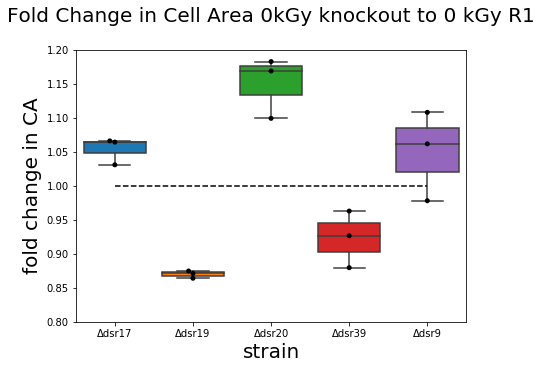

In [176]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_05062024_dsr17_r1_0k_list, CA_05062024_dsr19_r1_0k_list, CA_05062024_dsr20_r1_0k_list, CA_05062024_dsr39_r1_0k_list, CA_05062024_dsr9_r1_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_05062024_dsr17_r1_0k_list, CA_05062024_dsr19_r1_0k_list, CA_05062024_dsr20_r1_0k_list, CA_05062024_dsr39_r1_0k_list, CA_05062024_dsr9_r1_0k_list], color="black")

plt.title("Fold Change in Cell Area 0kGy knockout to 0 kGy R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr17", "\u0394dsr19", "\u0394dsr20","\u0394dsr39","\u0394dsr9"])
plt.ylabel("fold change in CA")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([0.8,1.2])

(0.8, 1.2)

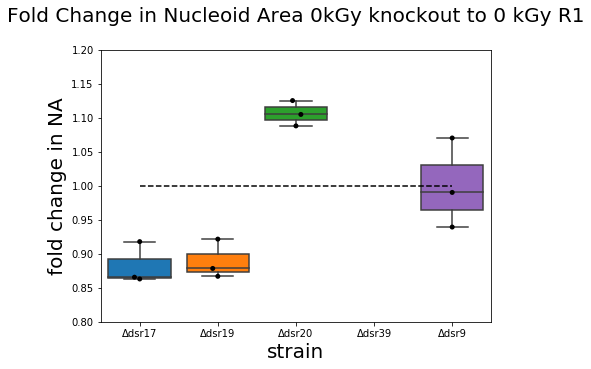

In [174]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[NA_05062024_dsr17_r1_0k_list, NA_05062024_dsr19_r1_0k_list, NA_05062024_dsr20_r1_0k_list, NA_05062024_dsr39_r1_0k_list, NA_05062024_dsr9_r1_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NA_05062024_dsr17_r1_0k_list, NA_05062024_dsr19_r1_0k_list, NA_05062024_dsr20_r1_0k_list, NA_05062024_dsr39_r1_0k_list, NA_05062024_dsr9_r1_0k_list], color="black")

plt.title("Fold Change in Nucleoid Area 0kGy knockout to 0 kGy R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr17", "\u0394dsr19", "\u0394dsr20","\u0394dsr39","\u0394dsr9"])
plt.ylabel("fold change in NA")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([0.8,1.2])

(0.8, 1.7)

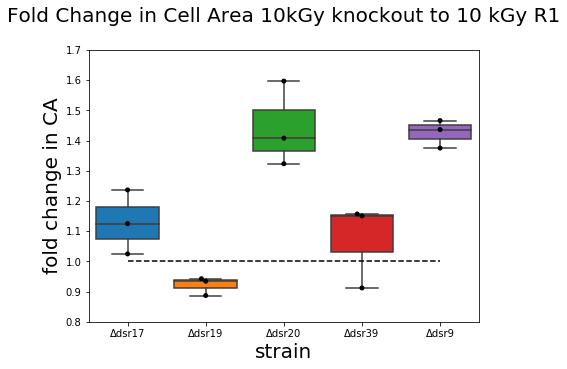

In [173]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_05062024_dsr17_r1_10k_list, CA_05062024_dsr19_r1_10k_list, CA_05062024_dsr20_r1_10k_list, CA_05062024_dsr39_r1_10k_list, CA_05062024_dsr9_r1_10k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_05062024_dsr17_r1_10k_list, CA_05062024_dsr19_r1_10k_list, CA_05062024_dsr20_r1_10k_list, CA_05062024_dsr39_r1_10k_list, CA_05062024_dsr9_r1_10k_list], color="black")

plt.title("Fold Change in Cell Area 10kGy knockout to 10 kGy R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr17", "\u0394dsr19", "\u0394dsr20","\u0394dsr39","\u0394dsr9"])
plt.ylabel("fold change in CA")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([0.8,1.7])

(0.8, 1.5)

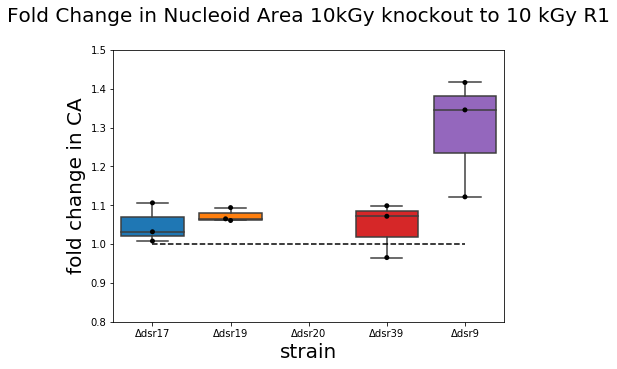

In [170]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[NA_05062024_dsr17_r1_10k_list, NA_05062024_dsr19_r1_10k_list, NA_05062024_dsr20_r1_10k_list, NA_05062024_dsr39_r1_10k_list, NA_05062024_dsr9_r1_10k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NA_05062024_dsr17_r1_10k_list, NA_05062024_dsr19_r1_10k_list, NA_05062024_dsr20_r1_10k_list, NA_05062024_dsr39_r1_10k_list, NA_05062024_dsr9_r1_10k_list], color="black")

plt.title("Fold Change in Nucleoid Area 10kGy knockout to 10 kGy R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr17", "\u0394dsr19", "\u0394dsr20","\u0394dsr39","\u0394dsr9"])
plt.ylabel("fold change in CA")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([0.8,1.5])

(0.8, 1.5)

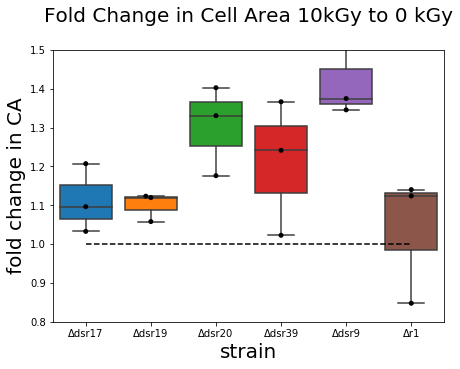

In [169]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_05062024_dsr17_10k_0k_list, CA_05062024_dsr19_10k_0k_list, CA_05062024_dsr20_10k_0k_list, CA_05062024_dsr39_10k_0k_list, CA_05062024_dsr9_10k_0k_list, CA_05062024_r1_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[CA_05062024_dsr17_10k_0k_list, CA_05062024_dsr19_10k_0k_list, CA_05062024_dsr20_10k_0k_list, CA_05062024_dsr39_10k_0k_list, CA_05062024_dsr9_10k_0k_list,CA_05062024_r1_10k_0k_list], color="black")

plt.title("Fold Change in Cell Area 10kGy to 0 kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr17", "\u0394dsr19", "\u0394dsr20","\u0394dsr39","\u0394dsr9","\u0394r1"])
plt.ylabel("fold change in CA")
plt.plot([1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.8,1.5])

(0.6, 1.2)

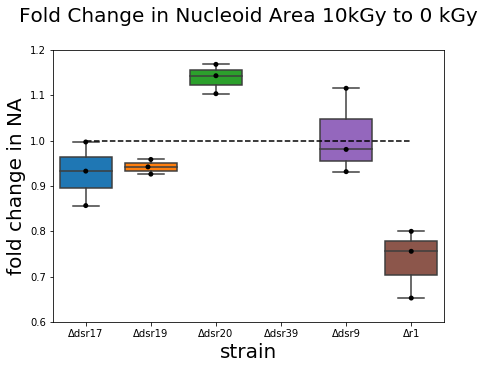

In [168]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[NA_05062024_dsr17_10k_0k_list, NA_05062024_dsr19_10k_0k_list, NA_05062024_dsr20_10k_0k_list, NA_05062024_dsr39_10k_0k_list, NA_05062024_dsr9_10k_0k_list, NA_05062024_r1_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NA_05062024_dsr17_10k_0k_list, NA_05062024_dsr19_10k_0k_list, NA_05062024_dsr20_10k_0k_list, NA_05062024_dsr39_10k_0k_list, NA_05062024_dsr9_10k_0k_list,NA_05062024_r1_10k_0k_list], color="black")

plt.title("Fold Change in Nucleoid Area 10kGy to 0 kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr17", "\u0394dsr19", "\u0394dsr20","\u0394dsr39","\u0394dsr9","\u0394r1"])
plt.ylabel("fold change in NA")
plt.plot([1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.6,1.2])

(0.8, 1.1)

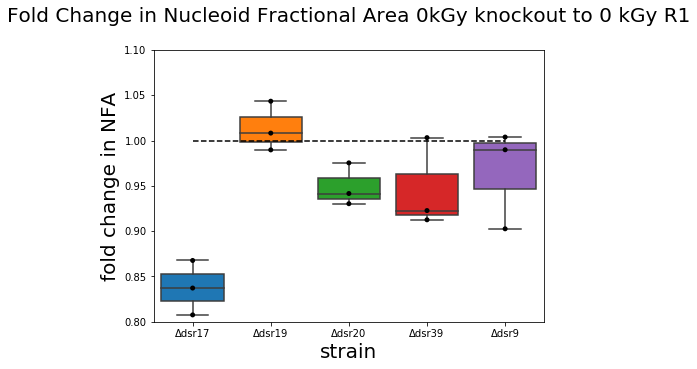

In [167]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[NFA_05062024_dsr17_r1_0k_list, NFA_05062024_dsr19_r1_0k_list, NFA_05062024_dsr20_r1_0k_list, NFA_05062024_dsr39_r1_0k_list, NFA_05062024_dsr9_r1_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NFA_05062024_dsr17_r1_0k_list, NFA_05062024_dsr19_r1_0k_list, NFA_05062024_dsr20_r1_0k_list, NFA_05062024_dsr39_r1_0k_list, NFA_05062024_dsr9_r1_0k_list], color="black")

plt.title("Fold Change in Nucleoid Fractional Area 0kGy knockout to 0 kGy R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr17", "\u0394dsr19", "\u0394dsr20","\u0394dsr39","\u0394dsr9"])
plt.ylabel("fold change in NFA")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([0.8,1.1])

(0.8, 1.5)

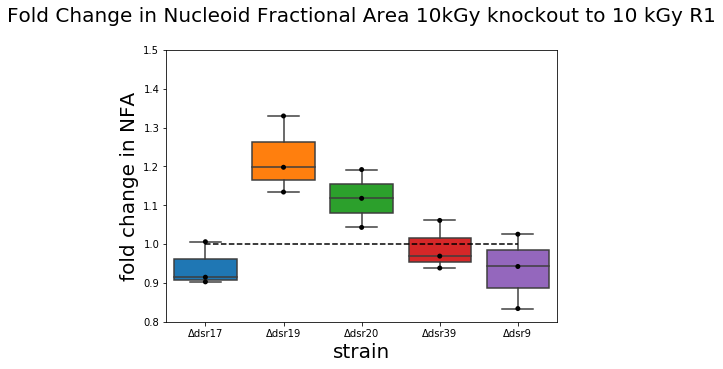

In [166]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[NFA_05062024_dsr17_r1_10k_list, NFA_05062024_dsr19_r1_10k_list, NFA_05062024_dsr20_r1_10k_list, NFA_05062024_dsr39_r1_10k_list, NFA_05062024_dsr9_r1_10k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NFA_05062024_dsr17_r1_10k_list, NFA_05062024_dsr19_r1_10k_list, NFA_05062024_dsr20_r1_10k_list, NFA_05062024_dsr39_r1_10k_list, NFA_05062024_dsr9_r1_10k_list], color="black")

plt.title("Fold Change in Nucleoid Fractional Area 10kGy knockout to 10 kGy R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr17", "\u0394dsr19", "\u0394dsr20","\u0394dsr39","\u0394dsr9"])
plt.ylabel("fold change in NFA")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([0.8,1.5])

(0.5, 1.1)

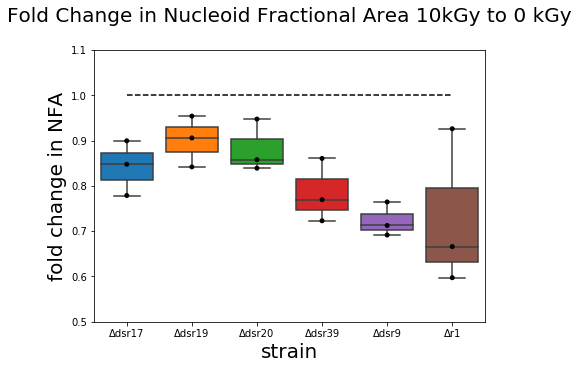

In [165]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[NFA_05062024_dsr17_10k_0k_list, NFA_05062024_dsr19_10k_0k_list, NFA_05062024_dsr20_10k_0k_list, NFA_05062024_dsr39_10k_0k_list, NFA_05062024_dsr9_10k_0k_list, NFA_05062024_r1_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[NFA_05062024_dsr17_10k_0k_list, NFA_05062024_dsr19_10k_0k_list, NFA_05062024_dsr20_10k_0k_list, NFA_05062024_dsr39_10k_0k_list, NFA_05062024_dsr9_10k_0k_list,NFA_05062024_r1_10k_0k_list], color="black")

plt.title("Fold Change in Nucleoid Fractional Area 10kGy to 0 kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr17", "\u0394dsr19", "\u0394dsr20","\u0394dsr39","\u0394dsr9","\u0394r1"])
plt.ylabel("fold change in NFA")
plt.plot([1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.5,1.1])

(0.9, 1.1)

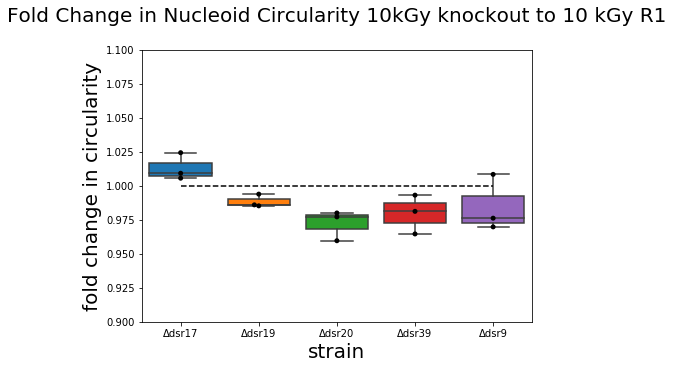

In [177]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[circ_05062024_dsr17_r1_10k_list, circ_05062024_dsr19_r1_10k_list, circ_05062024_dsr20_r1_10k_list, circ_05062024_dsr39_r1_10k_list, circ_05062024_dsr9_r1_10k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[circ_05062024_dsr17_r1_10k_list, circ_05062024_dsr19_r1_10k_list, circ_05062024_dsr20_r1_10k_list, circ_05062024_dsr39_r1_10k_list, circ_05062024_dsr9_r1_10k_list], color="black")

plt.title("Fold Change in Nucleoid Circularity 10kGy knockout to 10 kGy R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr17", "\u0394dsr19", "\u0394dsr20","\u0394dsr39","\u0394dsr9"])
plt.ylabel("fold change in circularity")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([0.9,1.1])

(0.925, 1.1)

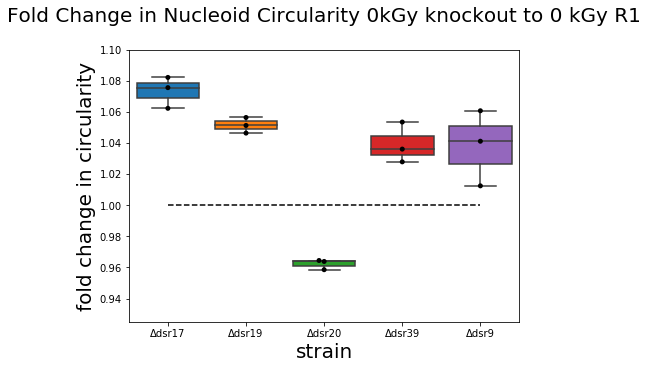

In [178]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[circ_05062024_dsr17_r1_0k_list, circ_05062024_dsr19_r1_0k_list, circ_05062024_dsr20_r1_0k_list, circ_05062024_dsr39_r1_0k_list, circ_05062024_dsr9_r1_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[circ_05062024_dsr17_r1_0k_list, circ_05062024_dsr19_r1_0k_list, circ_05062024_dsr20_r1_0k_list, circ_05062024_dsr39_r1_0k_list, circ_05062024_dsr9_r1_0k_list], color="black")

plt.title("Fold Change in Nucleoid Circularity 0kGy knockout to 0 kGy R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr17", "\u0394dsr19", "\u0394dsr20","\u0394dsr39","\u0394dsr9"])
plt.ylabel("fold change in circularity")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([0.925,1.1])

(0.95, 1.15)

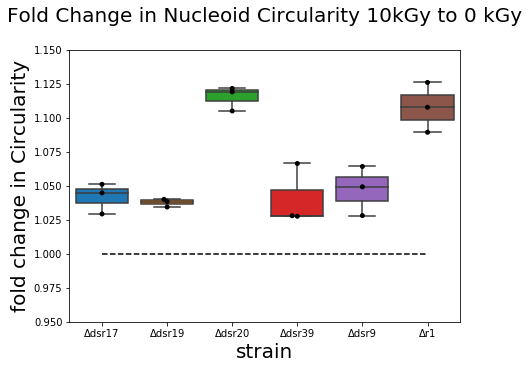

In [179]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[circ_05062024_dsr17_10k_0k_list, circ_05062024_dsr19_10k_0k_list, circ_05062024_dsr20_10k_0k_list, circ_05062024_dsr39_10k_0k_list, circ_05062024_dsr9_10k_0k_list, circ_05062024_r1_10k_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[circ_05062024_dsr17_10k_0k_list, circ_05062024_dsr19_10k_0k_list, circ_05062024_dsr20_10k_0k_list, circ_05062024_dsr39_10k_0k_list, circ_05062024_dsr9_10k_0k_list,circ_05062024_r1_10k_0k_list], color="black")

plt.title("Fold Change in Nucleoid Circularity 10kGy to 0 kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr17", "\u0394dsr19", "\u0394dsr20","\u0394dsr39","\u0394dsr9","\u0394r1"])
plt.ylabel("fold change in Circularity")
plt.plot([1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.95,1.15])

(0.85, 1.1)

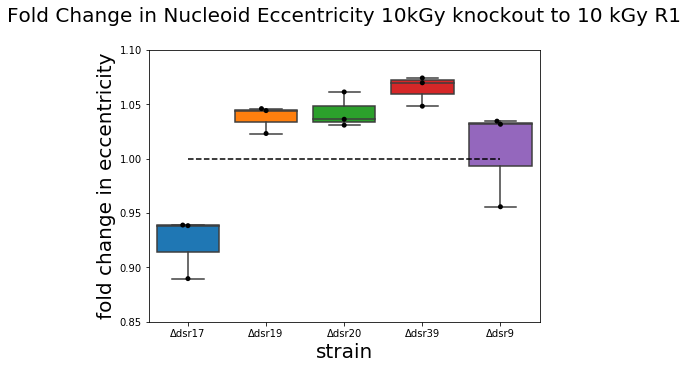

In [180]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[eccen_05062024_dsr17_r1_10k_list, eccen_05062024_dsr19_r1_10k_list, eccen_05062024_dsr20_r1_10k_list, eccen_05062024_dsr39_r1_10k_list, eccen_05062024_dsr9_r1_10k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[eccen_05062024_dsr17_r1_10k_list, eccen_05062024_dsr19_r1_10k_list, eccen_05062024_dsr20_r1_10k_list, eccen_05062024_dsr39_r1_10k_list, eccen_05062024_dsr9_r1_10k_list], color="black")

plt.title("Fold Change in Nucleoid Eccentricity 10kGy knockout to 10 kGy R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr17", "\u0394dsr19", "\u0394dsr20","\u0394dsr39","\u0394dsr9"])
plt.ylabel("fold change in eccentricity")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([0.85,1.1])

(0.85, 1.05)

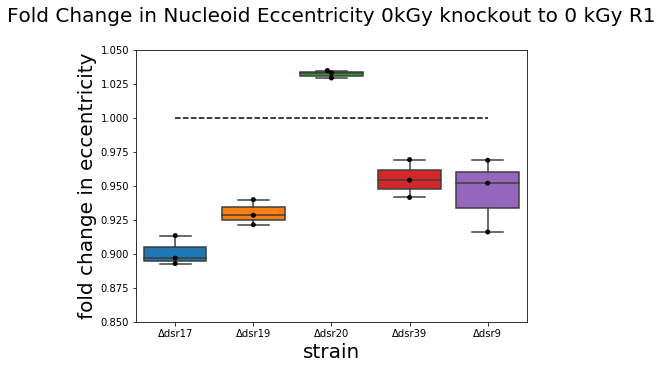

In [160]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[eccen_05062024_dsr17_r1_0k_list, eccen_05062024_dsr19_r1_0k_list, eccen_05062024_dsr20_r1_0k_list, eccen_05062024_dsr39_r1_0k_list, eccen_05062024_dsr9_r1_0k_list],saturation=1)

 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[eccen_05062024_dsr17_r1_0k_list, eccen_05062024_dsr19_r1_0k_list, eccen_05062024_dsr20_r1_0k_list, eccen_05062024_dsr39_r1_0k_list, eccen_05062024_dsr9_r1_0k_list], color="black")

plt.title("Fold Change in Nucleoid Eccentricity 0kGy knockout to 0 kGy R1\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr17", "\u0394dsr19", "\u0394dsr20","\u0394dsr39","\u0394dsr9"])
plt.ylabel("fold change in eccentricity")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([0.85,1.05])

(0.7, 1.05)

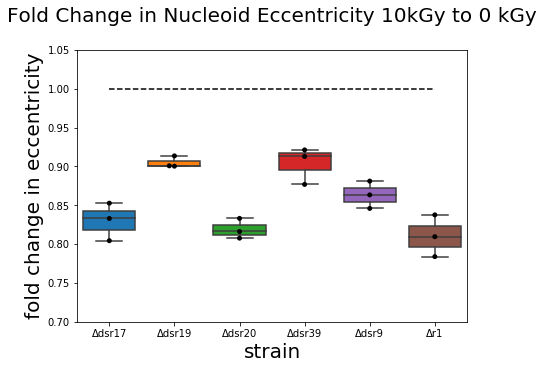

In [159]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(5)
ax = sns.boxplot(data=[eccen_05062024_dsr17_10k_0k_list, eccen_05062024_dsr19_10k_0k_list, eccen_05062024_dsr20_10k_0k_list, eccen_05062024_dsr39_10k_0k_list, eccen_05062024_dsr9_10k_0k_list, eccen_05062024_r1_10k_0k_list],saturation=1)
 
# Add jitter with the swarmplot function
ax = sns.swarmplot(data=[eccen_05062024_dsr17_10k_0k_list, eccen_05062024_dsr19_10k_0k_list, eccen_05062024_dsr20_10k_0k_list, eccen_05062024_dsr39_10k_0k_list, eccen_05062024_dsr9_10k_0k_list, eccen_05062024_r1_10k_0k_list], color="black")

plt.title("Fold Change in Nucleoid Eccentricity 10kGy to 0 kGy\n")
plt.xlabel("strain")
ax.set_xticklabels(["\u0394dsr17", "\u0394dsr19", "\u0394dsr20","\u0394dsr39","\u0394dsr9","\u0394r1"])
plt.ylabel("fold change in eccentricity")
plt.plot([1,1,1,1,1,1], "--", color = "black")
plt.ylim([0.7,1.05])